In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('admissions_data.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
features = df.iloc[:,0:-1]
labels = df.iloc[:,-1:]

feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [5]:
scaler = StandardScaler()
feature_train_scaled = scaler.fit_transform(feature_train)
feature_test_scaled = scaler.transform(feature_test)

In [6]:
## Create a neural network
model = Sequential(name="uni_admission_regression_model")
input = layers.InputLayer(input_shape=(features.shape[1],))
model.add(input)
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", metrics=['mae'], optimizer=opt)

In [7]:
stop = EarlyStopping(monitor = 'loss', mode='min', patience=20)
history = model.fit(feature_train_scaled, label_train, batch_size=4, epochs=100, verbose=0, callbacks=[stop])

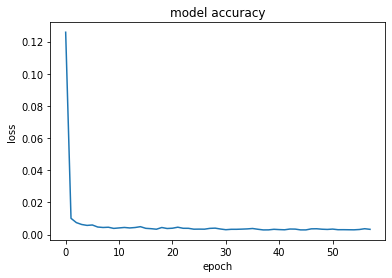

In [8]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

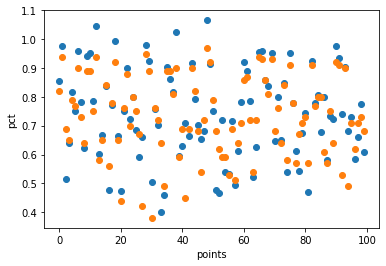

In [30]:
predict = model.predict(feature_test_scaled, batch_size=4)
x = [i for i in range(len(predict))]
plt.scatter(x, predict)
plt.scatter(x, label_test)
plt.ylabel('pct')
plt.xlabel('points')
plt.show()